In [74]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [75]:
import numpy as np
import pandas as pd

In [76]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [77]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [78]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [79]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [80]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [81]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [82]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

Text(0, 0.5, 'inches of rain')

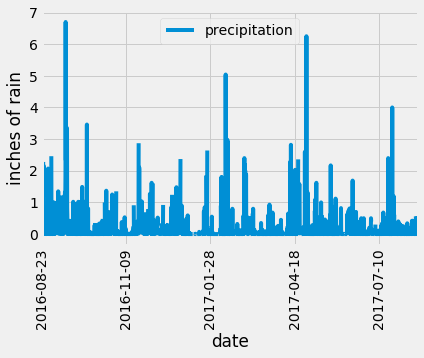

In [83]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results



# Calculate the date 1 year ago from the last data point in the database

lastyear = dt.date(2017,8,23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores

results = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date>=lastyear).all()


# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns = ['date', 'precipitation'])


# Sort the dataframe by date

df = df.sort_values('date')
df.set_index(df['date'],inplace = True)


# Use Pandas Plotting with Matplotlib to plot the data
df.plot(rot=90)
plt.xlabel('date')
plt.ylabel('inches of rain')

![precipitation](Images/precipitation.png)

In [84]:
# Use Pandas to calcualte the summary statistics for the precipitation data

df.describe()

precipitation
count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000

![describe](Images/describe.png)

In [85]:
# Design a query to show how many stations are available in this dataset?

stations = session.query(func.count(Station.station)).all()
stations

[(9)]

In [86]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

activestations = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
activestations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [87]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

temps = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()
temps

[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 0, 'temperature')

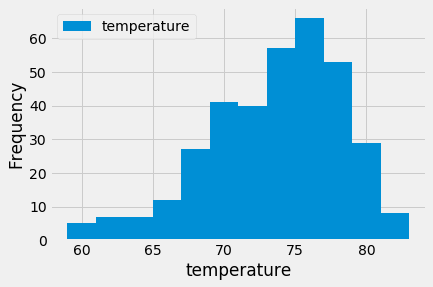

In [88]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

lastyear = dt.date(2017,8,23) - dt.timedelta(days=365)
results = session.query(Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date>=lastyear).all()
df2 = pd.DataFrame(results, columns = ['temperature'])
df2.plot.hist(bins = 12)
plt.xlabel('temperature')

![precipitation](Images/station-histogram.png)

In [89]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [91]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

tmin, tavg, tmax = calc_temps('2017-01-01', '2017-01-07')[0]
print(tmin, tavg, tmax)



62.0 68.36585365853658 74.0


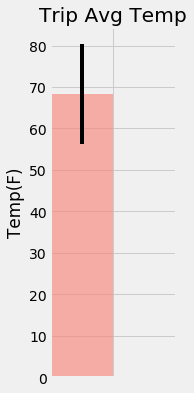

In [97]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)



fig, ax = plt.subplots(figsize=(2,6))
ax.bar(x=1, height= tavg, width=2, yerr=tmax-tmin, color='salmon', alpha=0.6)
ax.set_xlim(0,4)
ax.set_xticklabels('')
ax.set_title('Trip Avg Temp')
ax.set_ylabel('Temp(F)')
plt.show()

In [105]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
mydates = dt.date(2017,1,7) - dt.timedelta(days=7)

rainfall = session.query(Measurement.station, Measurement.date, Measurement.prcp).\
    filter(Measurement.date>=mydates).all()
rainfall

# results = session.query(Measurement.tobs).\
#     filter(Measurement.station == 'USC00519281').\
#     filter(Measurement.date>=lastyear).all()

# activestations = session.query(Measurement.station, func.count(Measurement.station)).\
#     group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

# results = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date>=lastyear).all()

[('USC00519397', '2016-12-31', 0.01),
 ('USC00519397', '2017-01-01', 0.0),
 ('USC00519397', '2017-01-02', 0.0),
 ('USC00519397', '2017-01-03', 0.0),
 ('USC00519397', '2017-01-04', 0.0),
 ('USC00519397', '2017-01-05', 0.0),
 ('USC00519397', '2017-01-06', 0.0),
 ('USC00519397', '2017-01-07', 0.0),
 ('USC00519397', '2017-01-08', 0.0),
 ('USC00519397', '2017-01-09', 0.0),
 ('USC00519397', '2017-01-10', 0.0),
 ('USC00519397', '2017-01-11', 0.0),
 ('USC00519397', '2017-01-12', 0.0),
 ('USC00519397', '2017-01-13', 0.0),
 ('USC00519397', '2017-01-14', 0.0),
 ('USC00519397', '2017-01-15', 0.0),
 ('USC00519397', '2017-01-16', 0.0),
 ('USC00519397', '2017-01-17', 0.0),
 ('USC00519397', '2017-01-18', 0.0),
 ('USC00519397', '2017-01-19', 0.0),
 ('USC00519397', '2017-01-20', 0.0),
 ('USC00519397', '2017-01-21', 0.0),
 ('USC00519397', '2017-01-22', 0.16),
 ('USC00519397', '2017-01-23', 0.0),
 ('USC00519397', '2017-01-24', 0.04),
 ('USC00519397', '2017-01-25', 0.03),
 ('USC00519397', '2017-01-26', 0.0

## Optional Challenge Assignment

In [20]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [21]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0)]

In [22]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


tmin       tavg  tmax
date                             
2018-01-01  62.0  69.153846  77.0
2018-01-02  60.0  69.396226  77.0
2018-01-03  62.0  68.909091  77.0
2018-01-04  58.0  70.000000  76.0
2018-01-05  56.0  67.964286  76.0

<IPython.core.display.Javascript object>


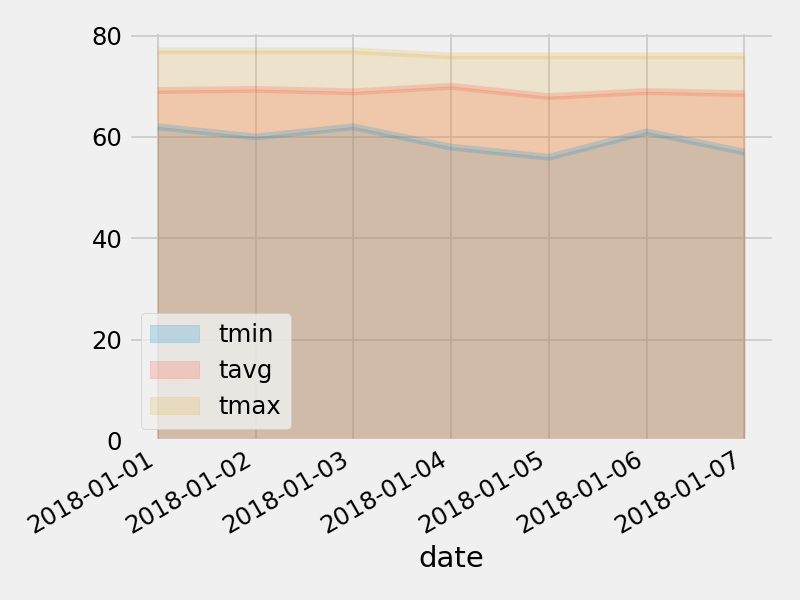

In [23]:
# Plot the daily normals as an area plot with `stacked=False`
